# **Data Analysis**
This notebook includes model prediction and analysis. This notebook uses user defined modules.

In [42]:
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt

sys.path.append("../scripts")

# User defined modules
from data_cleaning import clean_data
import customer_classification
import customer_retention
import product_recommendation
import revenue_optimization

## **Get clean data**

In [43]:
df = customer_classification.get_analysis_data("../data/formatted_data.csv")
df.head()

,Customer ID,Is Blocked,Created At,Outstanding Amount,Loyalty Points,Number of Employees,Upload restuarant location,country_code,Order ID,Order Status,...,Task_Status,Rating,Review,Latitude,Longitude,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Subtotal,Payment_Type
0,3144837,0.0,2021-03-15T17:13:19.000Z,0.0,0.0,nan,NaN,254,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3174590,0.0,2021-03-20T14:15:11.000Z,0.0,0.0,nan,NaN,254,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3181998,0.0,2021-03-21T15:36:51.000Z,0.0,0.0,nan,NaN,254,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3191244,0.0,2021-03-23T08:54:00.000Z,367.0,367.0,nan,NaN,254,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3274222,0.0,2021-04-06T13:52:39.000Z,0.0,0.0,nan,NaN,254,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Customer Retention**

### Generate features from data

In [44]:
# Define relevant columns 
customer_cols = ['Customer ID','Total Cost Price','Order Total', 'Sub Total', 'Tip', 'Discount',
        'Order ID', 'Redeemed Loyalty Points', 'Consumed Loyalty Points','Subtotal','Latitude','Longitude',
    'Number of Employees','Outstanding Amount','Loyalty Points','Rating',
    'Task_ID','country_code','Order Time']

# Define columns with monetary data
money_cols = ['Total Cost Price','Order Cost Total','Order Total',
                'Sub Total', 'Tip', 'Discount']

# Columns with generated columns
new_customer_cols = ['Customer ID','Order Cost Total','Order Total', 'Sub Total', 'Tip', 'Discount',
        'Order ID', 'Redeemed Loyalty Points', 'Consumed Loyalty Points','Subtotal','Latitude','Longitude',
    'Number of Employees','Outstanding Amount','Loyalty Points','Rating',
    'Task_ID','country_code','Order Time','gross_revenue','interval']

model_cols = ['Order Total', 'Avg Order Total', 'Order ID',
    'Redeemed Loyalty Points', 'Consumed Loyalty Points','Latitude','Longitude',
    'Avg Order Interval','Order Interval','repeat_customer']

x_cols = ['Order Total', 'Avg Order Total', 'Order ID',
    'Redeemed Loyalty Points', 'Consumed Loyalty Points',
    'Avg Order Interval','Order Interval']

january_df, after = customer_retention.split_data(df, customer_cols)

january_df = customer_retention.generate_new_columns(january_df, money_cols)

january_df = january_df[new_customer_cols].drop_duplicates()

customer_order_profile = customer_retention.aggregate_features(january_df)

purchasing_customers=customer_order_profile[customer_order_profile['Order ID']>0]

purchasing_customers=customer_order_profile[customer_order_profile['Order ID']>0]

purchasing_customers = customer_retention.get_repeat_customers_column(purchasing_customers,after)

X = purchasing_customers[x_cols].values
y = purchasing_customers['repeat_customer'].values

purchasing_customers.head()

,Customer ID,Order Total,Avg Order Total,gross_revenue,Order Time Max,Order Time Min,Order ID,Redeemed Loyalty Points,Consumed Loyalty Points,Task_ID,interval,Number of Employees,Latitude,Longitude,Outstanding Amount,Loyalty Points,country_code,Order Interval,Avg Order Interval,repeat_customer
32,3365770,67299.0,5176.846154,-42.40,2022-01-30 18:59:40+00:00,2022-01-17 13:47:02+00:00,13,1158.0,678.0,13,2.202851,nan,-1.287314,36.805498,55.0,55.0,254,13.217106,1.016700,0.0
40,3378262,98536.0,7038.285714,2031.14,2022-01-30 21:36:00+00:00,2022-01-05 18:09:32+00:00,14,498.0,809.0,13,3.591911,nan,-1.201032,36.900568,326.0,326.0,254,25.143380,1.795956,0.0
45,3385533,22406.0,2240.600000,350.78,2022-01-26 17:03:13+00:00,2022-01-07 15:06:16+00:00,10,351.0,222.0,9,3.816243,nan,-1.299200,36.890160,113.0,113.0,254,19.081215,1.908122,0.0
166,3636098,488758.0,9221.849057,29546.46,2022-01-31 21:54:34+00:00,2022-01-02 22:42:16+00:00,53,4977.0,4908.0,53,1.114111,5,-1.305033,36.817569,115.0,115.0,254,28.966875,0.546545,0.0
169,3647723,255380.0,5211.836735,7234.42,2022-01-30 20:21:35+00:00,2022-01-02 19:01:12+00:00,49,445.0,2533.0,49,1.168993,4,-1.190573,36.893340,1350.0,1350.0,254,28.055822,0.572568,0.0


### Show heatmap of generated features

<AxesSubplot:>

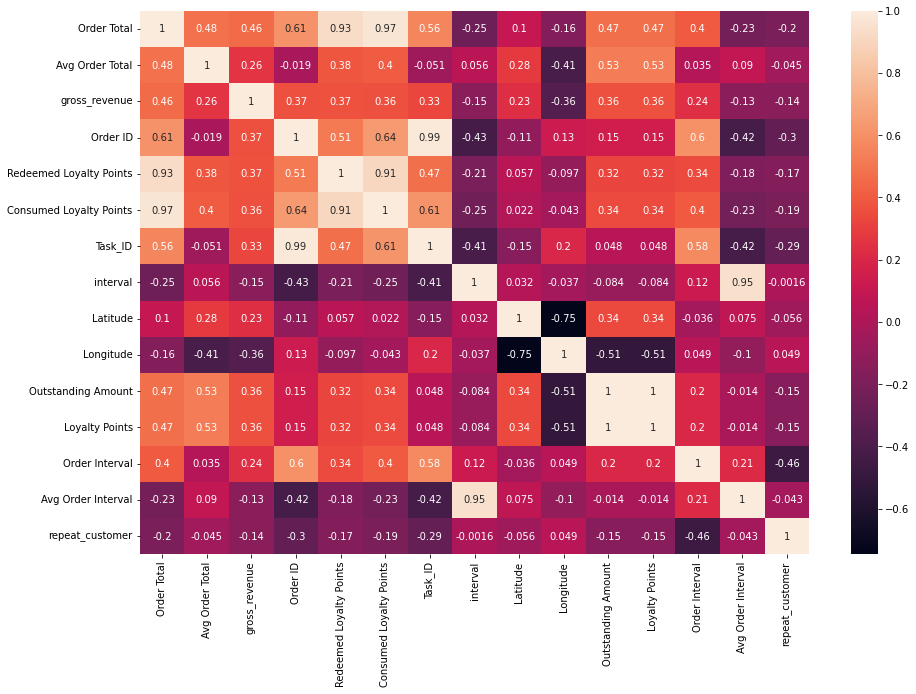

In [45]:
plt.rcParams["figure.figsize"] = (15,10)
corr = purchasing_customers.corr()
#corr.to_csv("../data/purchasing_corr.csv")
sns.heatmap(corr, annot=True)


### Make Predictions

In [46]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


X = purchasing_customers[x_cols].values
y = purchasing_customers['repeat_customer'].values
kf = KFold(n_splits=5)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    

0.7619047619047619
0.7619047619047619
0.746031746031746
0.6984126984126984
0.7741935483870968


## **Customer Classification**

### **Get features**

In [62]:
# Define relevant columns 
customer_cols = ['Customer ID','Total Cost Price','Order Total', 'Sub Total', 'Tip', 'Discount',
        'Order ID', 'Redeemed Loyalty Points', 'Consumed Loyalty Points','Subtotal','Latitude','Longitude',
    'Number of Employees','Outstanding Amount','Loyalty Points','Rating',
    'Task_ID','country_code','Order Time']

# Define columns with monetary data
money_cols = ['Total Cost Price','Order Cost Total','Order Total',
                'Sub Total', 'Tip', 'Discount']

# Columns with generated columns
new_customer_cols = ['Customer ID','Order Cost Total','Order Total', 'Sub Total', 'Tip', 'Discount',
        'Order ID', 'Redeemed Loyalty Points', 'Consumed Loyalty Points','Subtotal','Latitude','Longitude',
    'Number of Employees','Outstanding Amount','Loyalty Points','Rating',
    'Task_ID','country_code','Order Time','gross_revenue','interval']

model_cols = ['Order Total', 'Avg Order Total', 'gross_revenue',
        'Order ID','Redeemed Loyalty Points', 'Consumed Loyalty Points',
       'interval', 'Outstanding Amount', 'Loyalty Points', 'Order Interval',
       'Avg Order Interval']


classes_df = customer_classification.generate_new_columns(df[customer_cols], money_cols)

classes_df = classes_df[new_customer_cols].drop_duplicates()

customer_order_profile = customer_classification.aggregate_features(classes_df)

customer_purchase_history = customer_order_profile[customer_order_profile['Order ID']>0]

X_df = customer_purchase_history[model_cols].dropna(how='any').sample(frac=1)
X_df.head()

,Order Total,Avg Order Total,gross_revenue,Order ID,Redeemed Loyalty Points,Consumed Loyalty Points,interval,Outstanding Amount,Loyalty Points,Order Interval,Avg Order Interval
4230,17175.0,8587.500000,275.00,2,170.0,65.0,2.917164,0.0,0.0,2.917164,1.458582
5253,75570.0,25190.000000,995.00,3,0.0,646.0,1.013773,323.0,323.0,1.013773,0.337924
5100,7050.0,3525.000000,396.68,2,0.0,33.0,43.737350,33.0,33.0,43.737350,21.868675
5097,309214.0,4615.134328,-461182.18,67,1760.0,3031.0,1.338822,828.0,828.0,44.181111,0.659420
3808,154290.0,8120.526316,-229218.52,19,1170.0,1438.0,3.183504,319.0,319.0,28.651539,1.507976


#### **Get optimal classes**

In [63]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [64]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

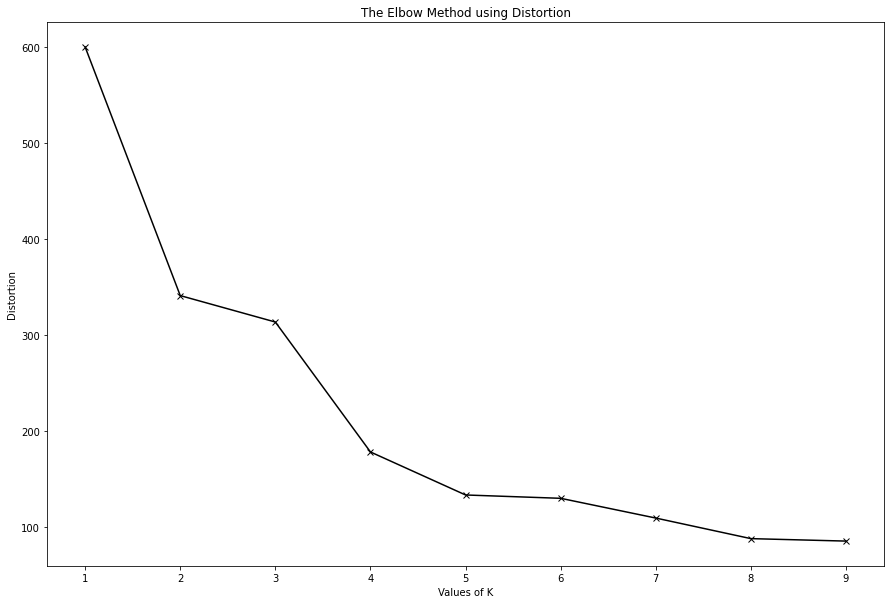

In [65]:
plt.plot(K, distortions, 'bx-', color='black')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### **Fit model**

In [51]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y=kmeans.predict(X)


### Reduce the number of features using PCA

<AxesSubplot:>

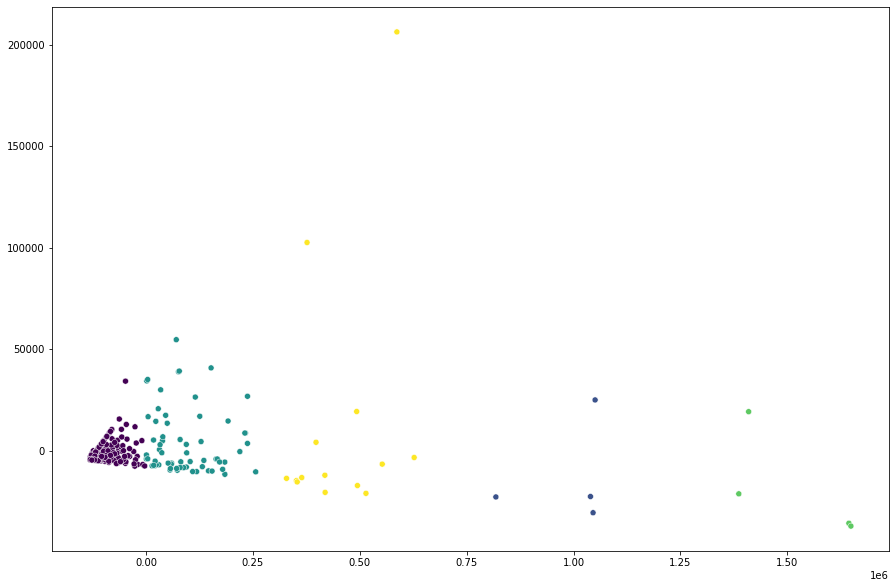

In [52]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features = pca.fit_transform(X)

sns.scatterplot(features[:,0], features[:,1],c=y)

# pca_df=pd.DataFrame(data=features)
# pca_df['classes']=y
#pca_df.to_csv("../data/pca_data.csv",index=False)

## **Recommendation System**

### Get features

In [53]:
recommendation_cols = ['Customer ID','Category Name']
recommendation_df = df[recommendation_cols].dropna()
recommendation_pivot = pd.pivot_table(data=recommendation_df,index='Customer ID',columns='Category Name',aggfunc=len,fill_value=0)
recommendation_pivot = (recommendation_pivot-recommendation_pivot.min())/(recommendation_pivot.max()-recommendation_pivot.min())+1
recommendation_data = recommendation_pivot.reset_index().melt(id_vars=['Customer ID'], var_name='Category Name', value_name='count')
recommendation_data.loc[recommendation_data['count']>1,'count']=2


### Split training and test set

In [54]:
X=recommendation_data.sample(frac=1)
X_train=X[:9000]
X_test = X[9000:]

### Fit model

In [55]:
from surprise import NMF, SVD, SVDpp, KNNBasic, KNNWithMeans, KNNWithZScore, CoClustering
from surprise import Reader, Dataset

algo = NMF()
data = Dataset.load_from_df(X_train,reader=Reader(rating_scale=(1, 2)))

algo.fit(data.build_full_trainset())
my_recs = []
d = {}
for uid,iid,rec in X_test.values:
    my_recs.append([uid,iid, algo.predict(uid=uid,iid=iid).est,rec])
    

### Transform predictions to meaningful predictions

In [56]:
pred_df = pd.DataFrame(my_recs,columns=['Customer ID','Category','predictions','true'])
pred_df['true_thresh']=1
pred_df['pred_thresh']=1
pred_df.loc[pred_df['true']>1,'true_thresh']=2
pred_df.loc[pred_df['predictions']>1.5,'pred_thresh']=2

pred_df

,Customer ID,Category,predictions,true,true_thresh,pred_thresh
0,5180594,Noodles & Spaghetti,1.000000,1.0,1,1
1,3973338,Cleaning & Hygiene,1.126397,1.0,1,1
2,4420869,Vegetables,1.000000,1.0,1,1
3,5135713,Noodles & Spaghetti,1.061599,1.0,1,1
4,4479754,Beverages,1.000000,1.0,1,1
...,...,...,...,...,...,...
823,4750132,Beer & Bitters,1.000000,1.0,1,1
824,4057340,Vegetables,1.000000,1.0,1,1
825,5176586,Vegetables,1.000000,1.0,1,1
826,5159833,Noodles & Spaghetti,1.000000,1.0,1,1


### Get accuracy

In [61]:
from sklearn.metrics import r2_score
accuracy_score(pred_df['true'], pred_df['pred_thresh'])

0.8635265700483091

### **Revenue Optimization**

### Get data

<AxesSubplot:>

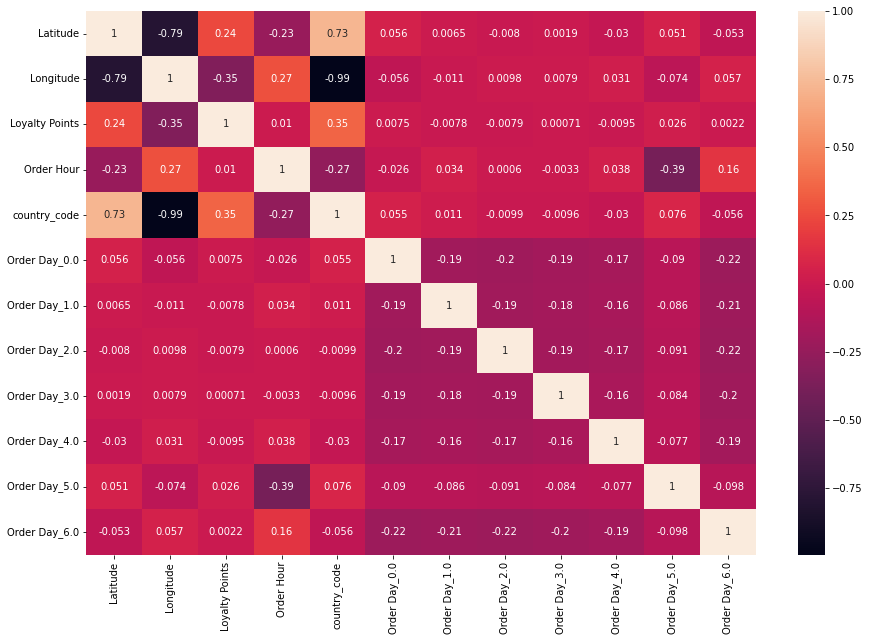

In [58]:
# Define relevant columns 
revenue_cols = ['Order ID','Latitude', 'Longitude','Category Name','Loyalty Points',
            'Order Time','Total Cost Price','Total Price','country_code','gross_revenue']

x_cols=['Latitude', 'Longitude','Loyalty Points','Order Day','Order Hour',
            'country_code']

revenue_df = revenue_optimization.generate_new_columns(df, revenue_cols).dropna()

y=revenue_df['gross_revenue'].values

revenue_df = pd.get_dummies(revenue_df[x_cols],columns=['Order Day'])


corr = revenue_df.corr()
sns.heatmap(corr,annot=True)

In [59]:
X = revenue_df.values

### Fit to model

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

revenue_df = revenue_df.sample(frac=1)
X = revenue_df.values
kf = KFold(n_splits=5)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    print(r2_score(y_test, y_pred))


-0.4189000816442072
-0.0012794467882801808
-0.007373368065923813
-0.018710948269171634
-0.04734284613646267
